### The Three-Body Problem

In the restricted three-body problem we model the motion of a light particle of mass m with coordinates r around two two heavier bodies with masses M1, M2 and positions R1, R2. We assume that this light particle does not affect the motion of the two heavier bodies, which continue to orbit their barycentre in circular motion. The resulting force felt by the light particle is,


$F = -G m M_1 \frac{r - R_1}{|r- R_1|^{3/2}} - -G m M_2 \frac{r - R_2}{|r- R_2|^{3/2}}$



We will use this assumption to find a stable position of a satellite orbiting the Earth-Moon Lagrangian 2 (L2) point.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

G = 6.6726*10**(-11)    # gravitational constant
m_E = 5.9742*10**24     # mass of the earth
m_M = 7.35*10**22       # mass of the moon
d = 3.844*10**8         # distance from the moon to the earth


The Moon and Earth orbit distances $r_M$ and $r_E$ respectively from their barycentre, with orbit period T. T is found using Kepler's law.

In [6]:
r_E = d*m_M/(m_M+m_E)
r_M = d*m_E/(m_M+m_E)

T = np.sqrt(4*np.pi**2*d**3/(G*(m_M+m_E)))

We calculate the force felt by the satellite at each time-step over the coures of one orbit. As no analytical solution exists for the resulting differential equation we must use numerical methods to solve for the motion of the satellite at each point. Here we use two methods: a Taylor expansion and the 4th order Runge Kutta expansion. Numerical methods use information about an object at time $t$ to calculate its characteristics at time $t+a$ where $a$ is a small time-step. 


In the Taylor expansion, the position $x$ and velocity $\dot x$ of the satellite at step $n+1$ are found using the position, velocity and acceleration at the previous step,

$x_{n+1} = x_n + a \dot x_n + \frac{a^2}{2} \ddot x_n + O(a^3)$

$\dot x_{n+1} = \dot x_n + a \ddot x_n + O(a^2)$

The Runge Kutta method is more complex as the velocity and acceleration are evaluated at multiple points across each time step and a weighted average used. The fourth-order Runge-Kutta method (RK4) uses four points, with a resulting error term of the order $O(a^5)$. RK4 greatly improves the accuracy and stability of the solutions as it uses more points than a Taylor expansion method with the same $a$.

In [7]:
#takes the x,y position of satellite, Earth, and Moon and calculates the acceleration of the satellite in either the x or y direction.
def accel(x,y,x_E,y_E,x_M,y_M,x_dir = True):   
    D_E = np.sqrt((x-x_E)**2 + (y-y_E)**2)
    D_M = np.sqrt((x-x_M)**2 + (y-y_M)**2)
    
    if x_dir:
        accelation = -G*m_E*(x-x_E)/D_E**3 - G*m_M*(x-x_M)/D_M**3
    else:
        accelation = -G*m_E*(y-y_E)/D_E**3 - G*m_M*(y-y_M)/D_M**3
    return accelation

#using the Taylor expansion method with initial distance and velocity r and v of the satellite
def taylor(r,v):
    
    x = r
    y = 0
    v_x = 0
    v_y = v
    
    xs = []
    ys = []
    
    for i in range(n):
        
        xs.append(x)
        ys.append(y)
        
        x_new = x+a*v_x + (a**2/2)*accel(x,y,x_E[i],y_E[i],x_M[i],y_M[i], True)
        v_x = v_x + a*accel(x,y,x_E[i],y_E[i],x_M[i],y_M[i], True)
        
        y_new = y+a*v_y + (a**2/2)*accel(x,y,x_E[i],y_E[i],x_M[i],y_M[i], False) 
        v_y = v_y + a*accel(x,y,x_E[i],y_E[i],x_M[i],y_M[i], False)

        x = x_new
        y = y_new
    
    return np.array([xs,ys])

In [8]:
#Using the RK4 method with initial distance and velocity r,v of the satellite.
def RK(r,v):
    
    x = r
    y = 0
    v_x = 0
    v_y = v
    
    xs = []
    ys = []
    
    for i in range(n):
        
        xs.append(x)
        ys.append(y)
        
        accel_x = accel(x,y,x_E[i],y_E[i],x_M[i],y_M[i], True)
        accel_y = accel(x,y,x_E[i],y_E[i],x_M[i],y_M[i], False)
        
        z_x_1 = x + (a/2)*v_x
        z_vx_1 = v_x + (a/2)*accel_x
        
        z_y_1 = y + (a/2)*v_y
        z_vy_1 = v_y + (a/2)*accel_y
        
        z_accx_1 = accel(z_x_1,z_y_1,x_E[i],y_E[i],x_M[i],y_M[i], True)
        z_accy_1 = accel(z_x_1,z_y_1,x_E[i],y_E[i],x_M[i],y_M[i], False)
        
        z_x_2 = x + (a/2)*z_vx_1
        z_vx_2 = v_x + (a/2)*z_accx_1
        
        z_y_2 = y + (a/2)*z_vy_1
        z_vy_2 = v_y + (a/2)*z_accy_1
        
        z_accx_2 = accel(z_x_2,z_y_2,x_E[i],y_E[i],x_M[i],y_M[i], True)
        z_accy_2 = accel(z_x_2,z_y_2,x_E[i],y_E[i],x_M[i],y_M[i], False)
        
        z_x_3 = x + a*z_vx_2
        z_vx_3 = v_x + a*z_accx_2
        
        z_y_3 = y + a*z_vy_2
        z_vy_3 = v_y + a*z_accy_2
        
        z_accx_3 = accel(z_x_3,z_y_3,x_E[i],y_E[i],x_M[i],y_M[i], True)
        z_accy_3 = accel(z_x_3,z_y_3,x_E[i],y_E[i],x_M[i],y_M[i], False)
        
        x = x + (a/6)*(v_x+2*z_vx_1+2*z_vx_2+z_vx_3)
        v_x = v_x + (a/6)*(accel_x + 2*z_accx_1 + 2*z_accx_2 + z_accx_3)
        
        y = y + (a/6)*(v_y+2*z_vy_1+2*z_vy_2+z_vy_3)
        v_y = v_y + (a/6)*(accel_y + 2*z_accy_1 + 2*z_accy_2 + z_accy_3)
        
    return np.array([xs,ys])

We now find the $x$ and $y$ positions for the Earth and Moon over 1 orbit using a step size $a = 2$s. 

In [9]:
a = 2    #here set a for all methods
n = int(T/a)     #number of time steps

#Find the positions of the Moon and Earth at each time step assuming circular motion.
x_E = []
y_E = []

x_M = []
y_M = []
times = np.linspace(0,T,n)

for i in range(n):
    x_E.append(r_E*np.cos(2*np.pi/T*times[i]))
    y_E.append(r_E*np.sin(2*np.pi/T*times[i]))
    
    x_M.append(r_M*np.cos(2*np.pi/T*times[i]))
    y_M.append(r_M*np.sin(2*np.pi/T*times[i]))

We use the numerical methods to find the optimal starting position of the satellite to ensure a stable orbit - i.e. it doesn't crash into the moon or earth, or fly out into space.

We use an initial distance of the satellite from the moon of,

 $r_{L2} = d \times (m_M / 3 m_E)^{1/3}$. 
 
We change the distance between the moon-earth barycentre and the satellite as $r = C \times r_{L2} + r_M$, finding the value of $C$ that minimises the distance between the start and end position of the satellite after one orbit. We find $C$ correct to 7 decimal places using $scipy.optimize$ for both the Taylor and Runge-Kutta methods. For each value of $r$, the initial circular velocity of the satellite is given by $v = 2 \pi r/T$. 

In [12]:
r_L2 = d*(m_M/(3*m_E))**(1/3)  #starting position of satellite

#Function determining the change in satellite position over 1 orbit
def function_to_minimise(c):
    r = r_L2*c + r_M       #initialise starting position and circular velocity for each value of c
    v = 2*np.pi*r/T
    satellite_position = taylor(r,v)
    return np.linalg.norm(satellite_position[:,-1] -satellite_position[:,-0])

from scipy.optimize import minimize_scalar
res = minimize_scalar(function_to_minimise, bounds = (1,1.2), options={'xatol': 1e-0})   #we know from brute force that C lies between 1 and 1.1.

We find that we need a value of $C$ correct to 7 significant figures for a stable orbit, with $C = 1.075377$ for the Taylor expansion and $C = 1.075383$ for the RK4 method. We find the resulting satellite orbits and plot them against the Moon and Earth orbits.

In [19]:
r = r_L2*1.075377 + r_M

v = 2*np.pi*r/T   #find the circular velocity of the satellite assuming period of orbit the same as the Moon-Earth system

satellite_taylor = taylor(r,v)

r = r_L2*1.075383 + r_M    #7.5415 for a final distance of 72611.24km away from moon for 5s. Using functional approach error 
v = 2*np.pi*r/T 

satellite_RK = RK(r,v)

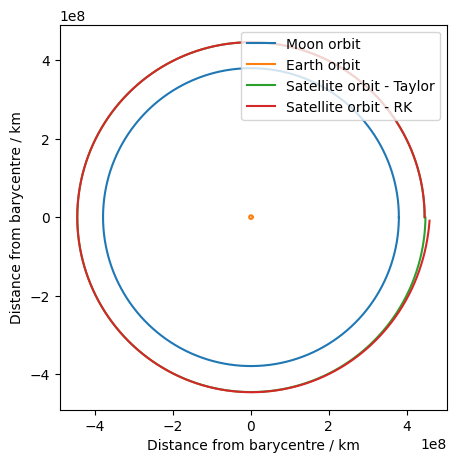

In [22]:
plt.figure(figsize = (5,5))

plt.plot(x_M,y_M, label = 'Moon orbit')
plt.plot(x_E,y_E, label = 'Earth orbit')
plt.plot(satellite_taylor[0],satellite_taylor[1], label = 'Satellite orbit - Taylor')
plt.plot(satellite_RK[0],satellite_RK[1], label = 'Satellite orbit - RK')


plt.xlabel('Distance from barycentre / km')
plt.ylabel('Distance from barycentre / km')

plt.legend()
plt.show()